In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def VaR(X, alpha: float=0.05):
	X = np.sort(X)
	var = (X[int(alpha * X.size)] + X[int(alpha * X.size) + 1])/2 * (-1)
	return var

In [3]:
def ES(X, alpha: float=0.05):
    X = np.sort(X)
    es = X[:int(alpha * X.size)].mean()*(-1)
    return es

In [4]:
p1 = pd.read_csv('problem1.csv')
p1 = p1 - p1.mean()

# normal distribution fitting
mean_n, var_n = stats.distributions.norm.fit(p1)

In [5]:
nsample = 10000
mu = mean_n
sigma = var_n
sim_rets_norm = np.random.normal(mu, sigma, nsample)

var_norm = VaR(sim_rets_norm)
es_norm = ES(sim_rets_norm)
print(var_norm)

0.08036208777569824


In [6]:
# generalize t distribution fitting
df, loc, scale = stats.t.fit(p1.values)
sim_rets_t = stats.t(df=df, loc = loc, scale=scale).rvs(nsample)

var_t = VaR(sim_rets_t)
es_t = ES(sim_rets_t)
print(var_t)

0.07697187212683101


In [7]:
print(f'VaR - Normal = {var_norm*100:.2f}%')
print(f'VaR - T = {var_t*100:.2f}%')
print(f'ES - Normal = {es_norm*100:.2f}%')
print(f'ES - T = {es_t*100:.2f}%')

VaR - Normal = 8.04%
VaR - T = 7.70%
ES - Normal = 10.04%
ES - T = 11.45%


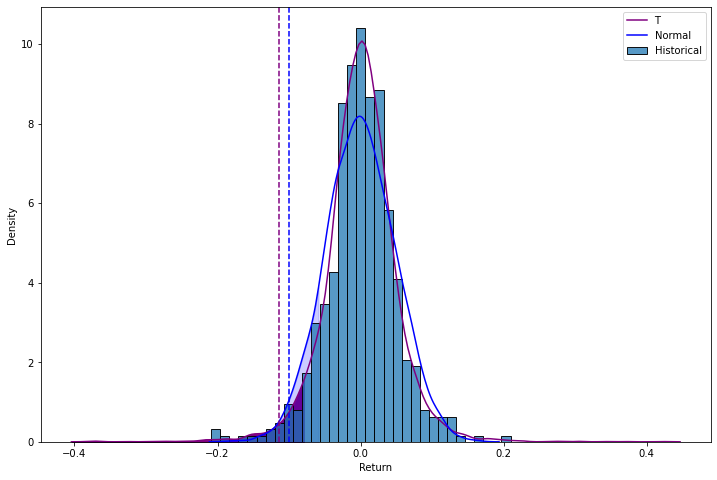

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(sim_rets_t, label='T', color='purple')
sns.kdeplot(sim_rets_norm, label='Normal', color='b')
sns.histplot(p1, stat='density',label='Historical')
plt.legend()
plt.xlabel('Return')

ret, ret_density = ax.lines[0].get_data()
ax.fill_between(ret, ret_density, where=(ret<-var_t), color='purple',alpha=1)
ret1, ret_density1 = ax.lines[1].get_data()
ax.fill_between(ret1, ret_density1, where=(ret<-var_norm), color='b',alpha=0.2)

ax.axvline(-es_t, 0, 10, color='purple', linestyle='--')
ax.axvline(-es_norm, 0, 10, color='b', linestyle='--')


